Peut-on établir un lien entre la densité de médecins par spécialité  et par territoire et la pratique du dépassement d'honoraires ? Est-ce  dans les territoires où la densité est la plus forte que les médecins  pratiquent le moins les dépassement d'honoraires ? Est ce que la densité de certains médecins / praticiens est corrélé à la densité de population pour certaines classes d'ages (bebe/pediatre, personnes agées / infirmiers etc...) ?

In [153]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


In [154]:
Location = 'Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2016.xls'
df = pd.read_excel(Location, sep=',', encoding='latin-1', sheet_name='Spécialistes')
df = df.dropna()
df =df[df['DEPASSEMENTS (Euros)'] != 'nc']
df.head()

,Spécialistes,DEPARTEMENT,EFFECTIFS,HONORAIRES SANS DEPASSEMENT (Euros),DEPASSEMENTS (Euros),FRAIS DE DEPLACEMENT (Euros),TOTAL DES HONORAIRES (Euros)
0,02- Anesthésie-réanimation chirurgicale,01- Ain,17,4.53008e+06,2.49618e+06,0,7.02626e+06
1,02- Anesthésie-réanimation chirurgicale,02- Aisne,19,4.98526e+06,373838,0,5.3591e+06
2,02- Anesthésie-réanimation chirurgicale,03- Allier,19,5.1029e+06,560979,0,5.66388e+06
5,02- Anesthésie-réanimation chirurgicale,06- Alpes-Maritimes,110,2.48538e+07,1.08163e+07,0,3.56701e+07
6,02- Anesthésie-réanimation chirurgicale,07- Ardèche,23,5.27125e+06,802542,0,6.07379e+06


In [155]:
df_depassement_specialite = df.groupby(['Spécialistes']).agg({'EFFECTIFS':sum, 'DEPASSEMENTS (Euros)':sum })
df_depassement_specialite = df_depassement_specialite.drop(['TOTAL SPECIALISTES','TOTAL MEDECINS'])
df_depassement_specialite
 

,EFFECTIFS,DEPASSEMENTS (Euros)
Spécialistes,,
02- Anesthésie-réanimation chirurgicale,10669,7.987273e+08
03- Pathologie cardio-vasculaire,13844,1.602430e+08
04- Chirurgie générale,3519,2.924245e+08
05- Dermato-vénéréologie,8850,2.874601e+08
06- Radiodiagnostic et imagerie médicale,16086,5.594835e+08
07- Gynécologie obstétrique,10435,7.645232e+08
08- Gastro-entérologie et hépatologie,6001,1.854107e+08
09- Médecine interne,714,2.407354e+07
10- Neurochirurgie,495,8.365893e+07


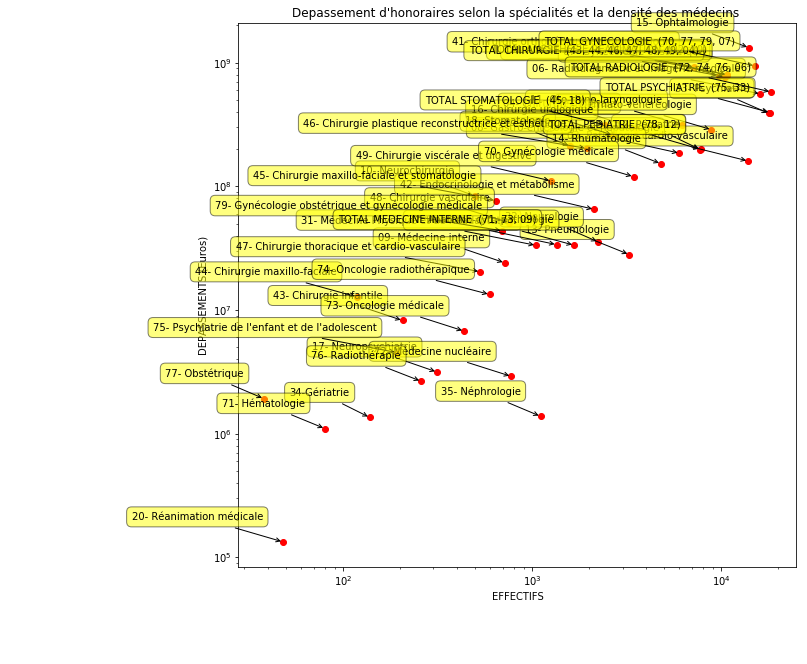

In [156]:
fig = plt.figure(figsize = (10,10)) 
X = df_depassement_specialite['EFFECTIFS']
Y = df_depassement_specialite['DEPASSEMENTS (Euros)']
indexes = df_depassement_specialite.index
labels = [re.findall(r'\d+', x) for x in indexes]
plt.plot(X,Y, 'ro')
plt.xlabel('EFFECTIFS')
plt.ylabel('DEPASSEMENTS (Euros)')
plt.xscale('log')
plt.yscale('log')
plt.title('Depassement d\'honoraires selon la spécialités et la densité des médecins ')
for label, x, y in zip(indexes, X, Y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()

In [157]:
df_depassement_departement = df.groupby(['DEPARTEMENT']).agg({'EFFECTIFS':sum, 'DEPASSEMENTS (Euros)':sum })
df_depassement_departement = df_depassement_departement.drop(['TOTAL FRANCE METROPOLITAINE','TOTAL France ENTIERE','TOTAL OUTRE-MER'])
df_depassement_departement

,EFFECTIFS,DEPASSEMENTS (Euros)
DEPARTEMENT,,
01- Ain,1213,4.629320e+07
02- Aisne,1337,1.733127e+07
03- Allier,982,1.810566e+07
04- Alpes-Hte-Provence,410,4.725086e+06
05- Hautes-Alpes,411,2.300044e+06
06- Alpes-Maritimes,6965,3.152685e+08
07- Ardèche,877,2.617384e+07
08- Ardennes,549,3.134781e+06
09- Ariège,286,1.408631e+06


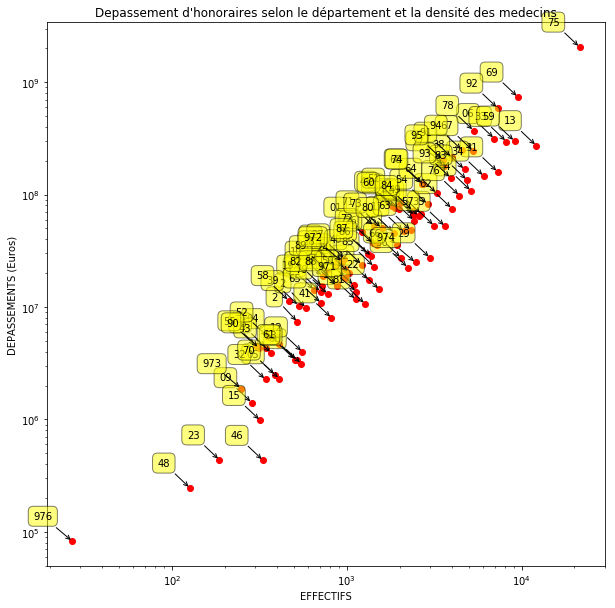

In [158]:
fig = plt.figure(figsize = (10,10)) 
X = df_depassement_departement['EFFECTIFS']
Y = df_depassement_departement['DEPASSEMENTS (Euros)']
indexes = df_depassement_departement.index
labels = [re.findall(r'\d+', x)[0] for x in indexes]
plt.plot(X,Y, 'ro')
plt.xlabel('EFFECTIFS')
plt.ylabel('DEPASSEMENTS (Euros)')
plt.xscale('log')
plt.yscale('log')
plt.title('Depassement d\'honoraires selon le département et la densité des medecins')
for label, x, y in zip(labels, X, Y):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

plt.show()